In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager, rc
import dataframe_image as dfi
from matplotlib.dates import DateFormatter, MonthLocator

In [2]:
# 한글 폰트 설정
font_path = r"C:\Windows\Fonts\batang.ttc"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
print(f"설정된 폰트: {font_name}")

설정된 폰트: Batang


In [3]:
# 작업 디렉토리 및 저장 위치 설정
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
analysis_dir = os.path.join(base_dir, 'output', 'analysis')
os.makedirs(analysis_dir, exist_ok=True)

In [4]:
# 데이터 로드
file_path = os.path.join(base_dir, 'data', 'last_clustered_seoul.csv')
data = pd.read_csv(file_path)

In [5]:
# 파생 변수 생성
data['sales_amount'] = data['total_quantity'] * data['average_price']
data['quantity_price_ratio'] = data['total_quantity'] / data['average_price']
data['price_volatility'] = data['average_price'].pct_change().fillna(0).abs()
data['quantity_volatility'] = data['total_quantity'].pct_change().fillna(0).abs()
data['month'] = pd.to_datetime(data['date']).dt.month

# 데이터 프레임 날짜 형식으로 변환
data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

In [6]:
# 기본 통계 확인
data_describe = data.describe()
stats_file = os.path.join(analysis_dir, '기본통계요약_긴버전.csv')
data_describe.to_csv(stats_file, encoding='utf-8-sig')
print(f"기본 통계 요약이 저장되었습니다: {stats_file}")
stats_image_path = os.path.join(analysis_dir, '기본통계요약.png')
dfi.export(data_describe, stats_image_path)
print(f"기본 통계 요약 이미지가 저장되었습니다: {stats_image_path}")

# 기본 통계 요약 가로로 반 나눈 버전 저장
# 가로로 반 나누기
half_columns = len(data_describe.columns) // 2
first_half = data_describe.iloc[:, :half_columns]
second_half = data_describe.iloc[:, half_columns:]

# 첫 번째 절반 저장
first_half_image_path = os.path.join(analysis_dir, '기본통계요약_절반1.png')
dfi.export(first_half, first_half_image_path)
print(f"기본 통계 요약 첫 번째 절반 이미지가 저장되었습니다: {first_half_image_path}")

# 두 번째 절반 저장
second_half_image_path = os.path.join(analysis_dir, '기본통계요약_절반2.png')
dfi.export(second_half, second_half_image_path)
print(f"기본 통계 요약 두 번째 절반 이미지가 저장되었습니다: {second_half_image_path}")


기본 통계 요약이 저장되었습니다: c:\projects\ClimateMarketForecast\output\analysis\기본통계요약_긴버전.csv
기본 통계 요약 이미지가 저장되었습니다: c:\projects\ClimateMarketForecast\output\analysis\기본통계요약.png
기본 통계 요약 첫 번째 절반 이미지가 저장되었습니다: c:\projects\ClimateMarketForecast\output\analysis\기본통계요약_절반1.png
기본 통계 요약 두 번째 절반 이미지가 저장되었습니다: c:\projects\ClimateMarketForecast\output\analysis\기본통계요약_절반2.png


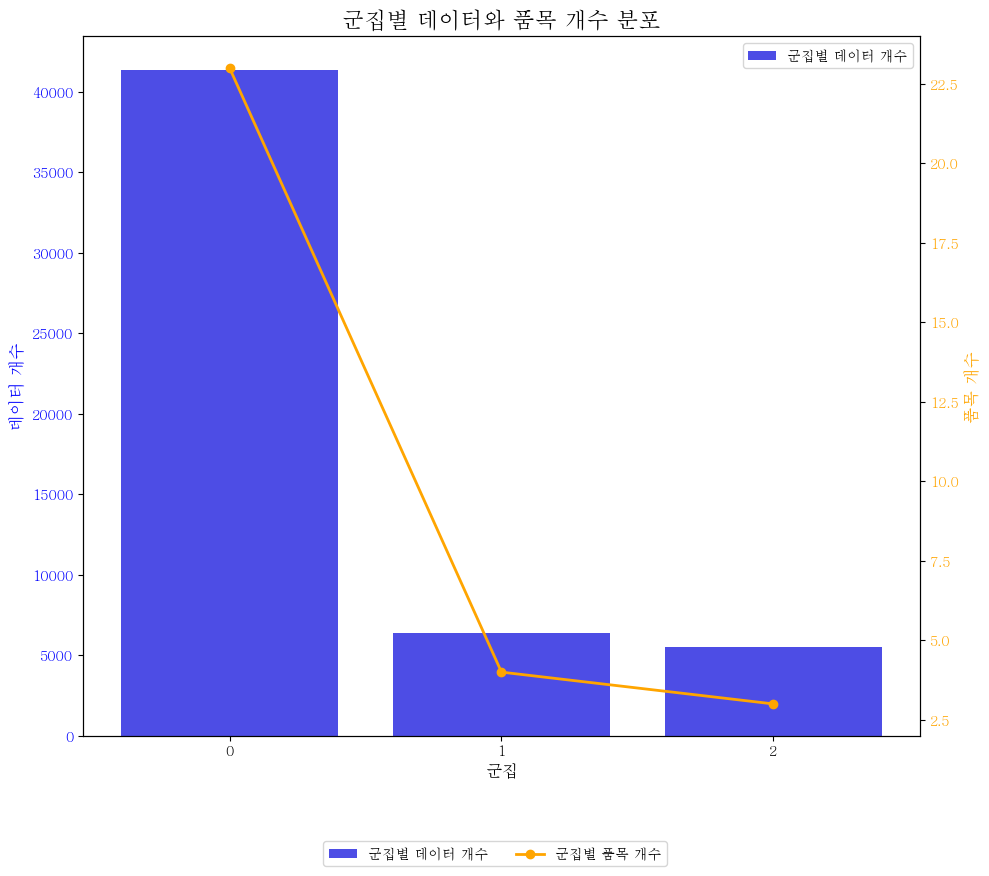

In [7]:
# 군집별 데이터 분포와 군집별 품목 개수 분포 (이중 축 사용)
fig, ax1 = plt.subplots(figsize=(10, 8))

# 왼쪽 Y축: 군집별 데이터 분포
sns.countplot(x='cluster', data=data, ax=ax1, alpha=0.8, color='blue', label='군집별 데이터 개수')
ax1.set_xlabel('군집', fontsize=12)
ax1.set_ylabel('데이터 개수', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('군집별 데이터와 품목 개수 분포', fontsize=16)

# 오른쪽 Y축: 군집별 품목 개수 분포
ax2 = ax1.twinx()
unique_items_per_cluster = data.groupby('cluster')['item'].nunique()
ax2.plot(unique_items_per_cluster.index, unique_items_per_cluster.values, color='orange', marker='o', label='군집별 품목 개수', linewidth=2)
ax2.set_ylabel('품목 개수', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 범례 추가
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# 저장 및 출력
plot_path = os.path.join(analysis_dir, '군집별_데이터_및_품목_개수_분포_이중축.png')
plt.tight_layout()
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()


In [8]:
# 군집별 평균값 분석
cluster_summary = data.groupby('cluster').agg({
    'average_price': ['mean', 'std'],
    'total_quantity': ['mean', 'std'],
    'sales_amount': ['mean', 'std']
}).reset_index()
summary_file = os.path.join(analysis_dir, '군집별_요약통계.csv')
cluster_summary.to_csv(summary_file, encoding='utf-8-sig', index=False)
print(f"군집별 요약 통계가 저장되었습니다: {summary_file}")
summary_image_path = os.path.join(analysis_dir, '군집별_요약통계.png')
dfi.export(cluster_summary, summary_image_path)
print(f"군집별 요약 통계 이미지가 저장되었습니다: {summary_image_path}")

군집별 요약 통계가 저장되었습니다: c:\projects\ClimateMarketForecast\output\analysis\군집별_요약통계.csv
군집별 요약 통계 이미지가 저장되었습니다: c:\projects\ClimateMarketForecast\output\analysis\군집별_요약통계.png


C:\Users\skfkz\AppData\Local\Temp\ipykernel_70624\2052818106.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x='date', y='average_price', data=data, hue='cluster', estimator='mean', ci=None)


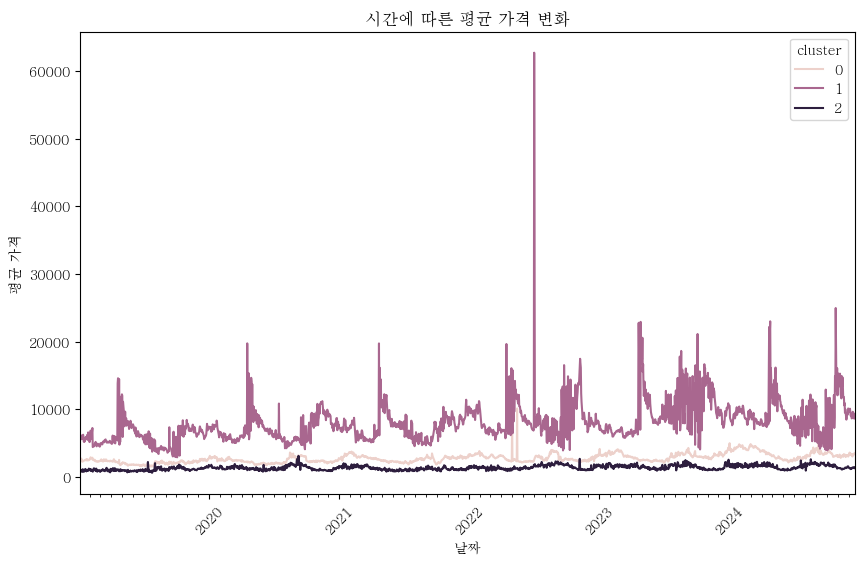

In [10]:
# 시간에 따른 변화 분석
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='date', y='average_price', data=data, hue='cluster', estimator='mean', ci=None)
plt.title('시간에 따른 평균 가격 변화')
plt.xlabel('날짜')
plt.ylabel('평균 가격')

# 축 레이블 설정
ax.xaxis.set_major_locator(MonthLocator(interval=12))
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xlim([data['date'].min(), data['date'].max()]) 
plt.xticks(rotation=45)

# 저장 및 출력
plot_path = os.path.join(analysis_dir, '시간별_평균_가격_변화.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

C:\Users\skfkz\AppData\Local\Temp\ipykernel_70624\1161838071.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x='date', y='total_quantity', data=data, hue='cluster', estimator='mean', ci=None)


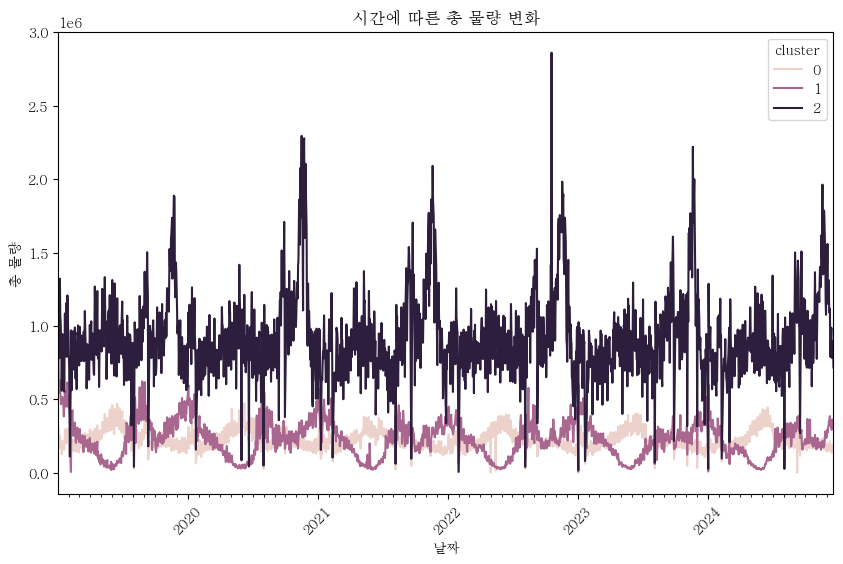

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='date', y='total_quantity', data=data, hue='cluster', estimator='mean', ci=None)
plt.title('시간에 따른 총 물량 변화')
plt.xlabel('날짜')
plt.ylabel('총 물량')

# 축 레이블 설정 및 범위 지정
ax.xaxis.set_major_locator(MonthLocator(interval=12))
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xlim([data['date'].min(), data['date'].max()])
plt.xticks(rotation=45)

# 저장 및 출력
plot_path = os.path.join(analysis_dir, '시간별_총_물량_변화.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

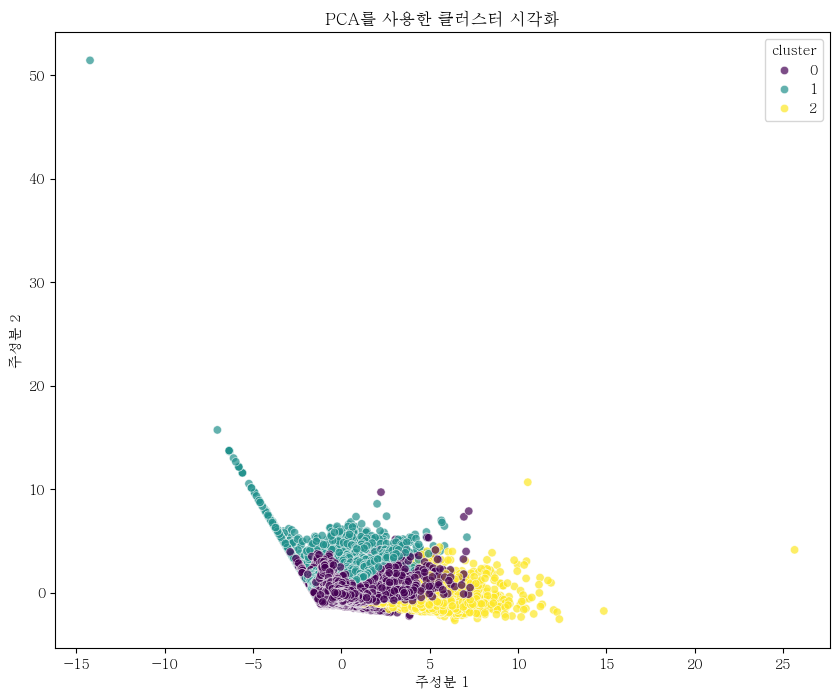

In [12]:
# PCA 및 클러스터 시각화
features = ['average_price', 'total_quantity', 'sales_amount', 'quantity_price_ratio']
data_scaled = StandardScaler().fit_transform(data[features])
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'], data['PCA2'] = data_pca[:, 0], data_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data, palette='viridis', alpha=0.7)
plt.title('PCA를 사용한 클러스터 시각화')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plot_path = os.path.join(analysis_dir, 'PCA_클러스터_시각화.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

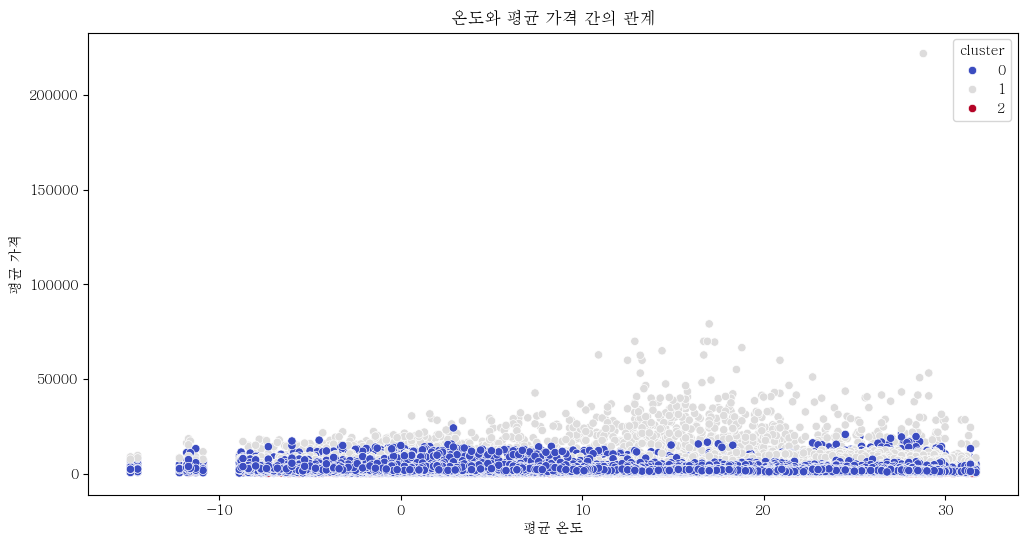

In [13]:
# 날씨와 가격/물량의 관계 분석
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_temperature', y='average_price', hue='cluster', data=data, palette='coolwarm')
plt.title('온도와 평균 가격 간의 관계')
plt.xlabel('평균 온도')
plt.ylabel('평균 가격')
plot_path = os.path.join(analysis_dir, '온도_대_평균_가격.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

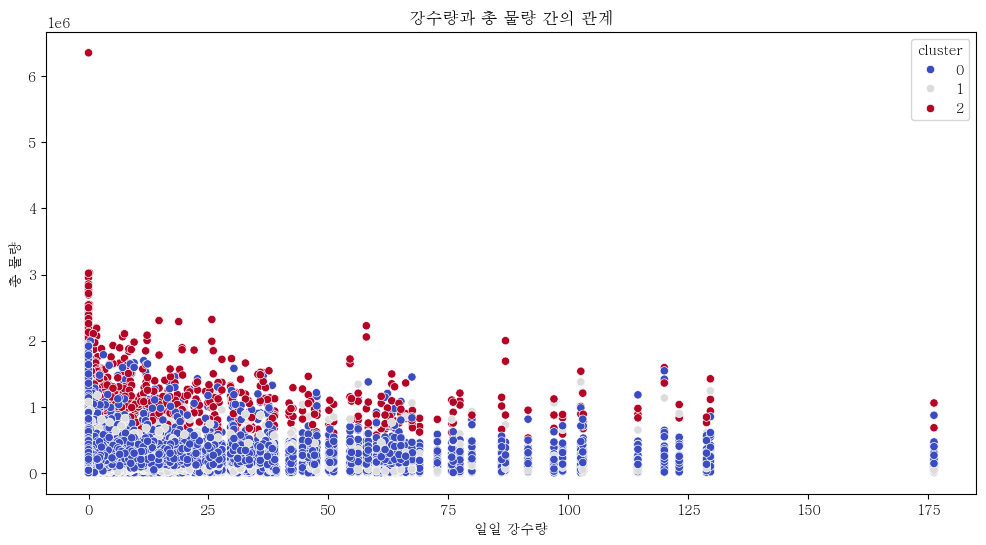

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='daily_rainfall', y='total_quantity', hue='cluster', data=data, palette='coolwarm')
plt.title('강수량과 총 물량 간의 관계')
plt.xlabel('일일 강수량')
plt.ylabel('총 물량')
plot_path = os.path.join(analysis_dir, '강수량_대_총_물량.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

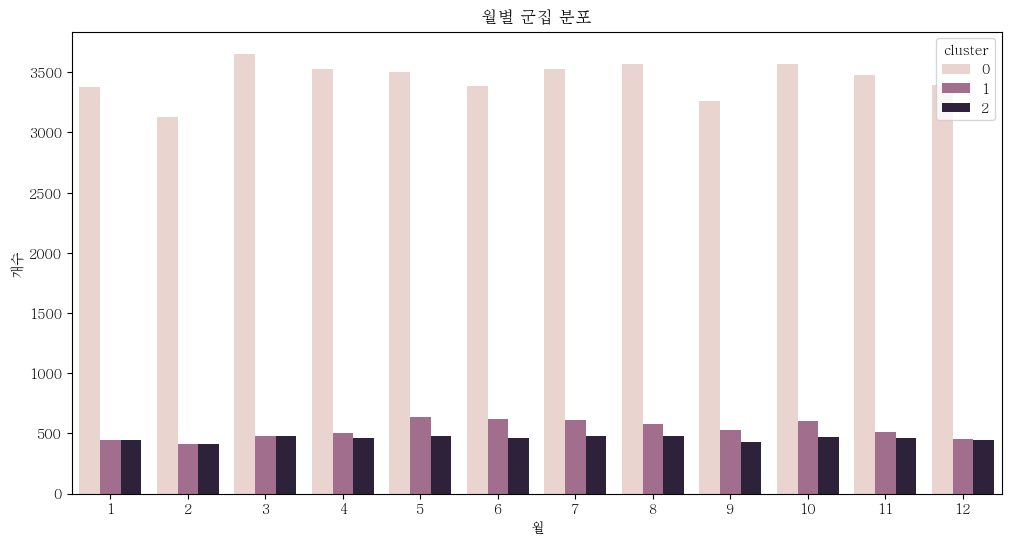

In [15]:
# 월별 변화 분석
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='cluster', data=data)
plt.title('월별 군집 분포')
plt.xlabel('월')
plt.ylabel('개수')
plot_path = os.path.join(analysis_dir, '월별_군집_분포.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

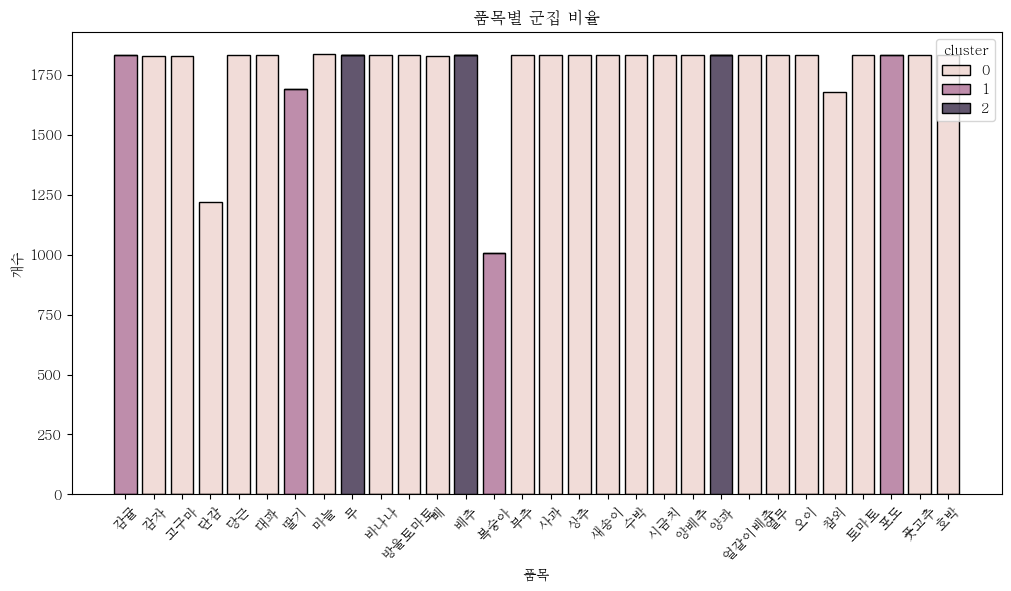

In [16]:
# 품목별 클러스터 비율
plt.figure(figsize=(12, 6))
sns.histplot(data, x='item', hue='cluster', multiple='stack', shrink=0.8)
plt.title('품목별 군집 비율')
plt.xlabel('품목')
plt.ylabel('개수')
plt.xticks(rotation=45)
plot_path = os.path.join(analysis_dir, '품목별_군집_비율.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

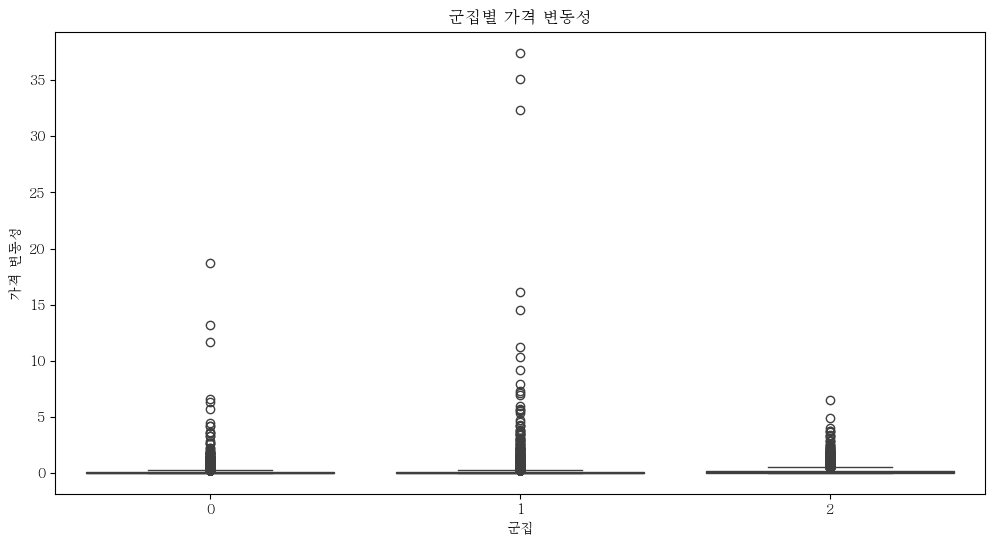

In [17]:
# 가격 및 물량 변동성 분석
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='price_volatility', data=data)
plt.title('군집별 가격 변동성')
plt.xlabel('군집')
plt.ylabel('가격 변동성')
plot_path = os.path.join(analysis_dir, '군집별_가격_변동성.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

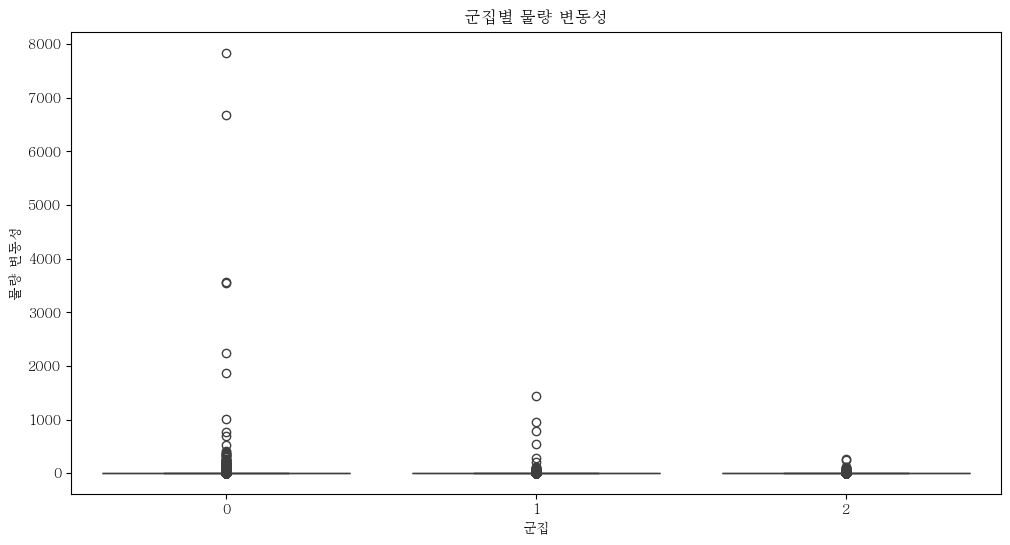

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='quantity_volatility', data=data)
plt.title('군집별 물량 변동성')
plt.xlabel('군집')
plt.ylabel('물량 변동성')
plot_path = os.path.join(analysis_dir, '군집별_물량_변동성.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

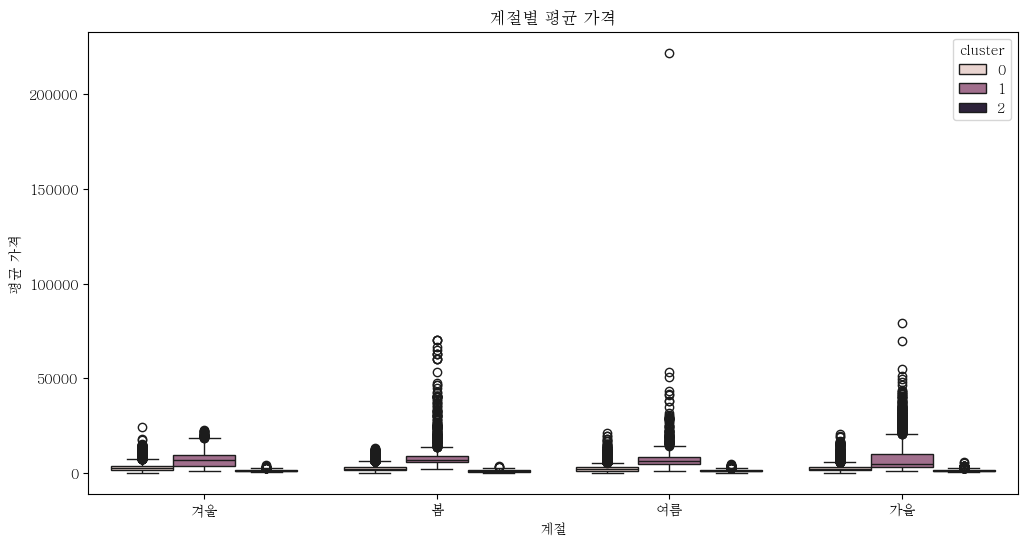

In [19]:
# 10. 계절적 요인 분석
data['season'] = data['month'].apply(lambda x: '봄' if x in [3, 4, 5] else '여름' if x in [6, 7, 8] else '가을' if x in [9, 10, 11] else '겨울')
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='average_price', hue='cluster', data=data)
plt.title('계절별 평균 가격')
plt.xlabel('계절')
plt.ylabel('평균 가격')
plot_path = os.path.join(analysis_dir, '계절별_평균_가격.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

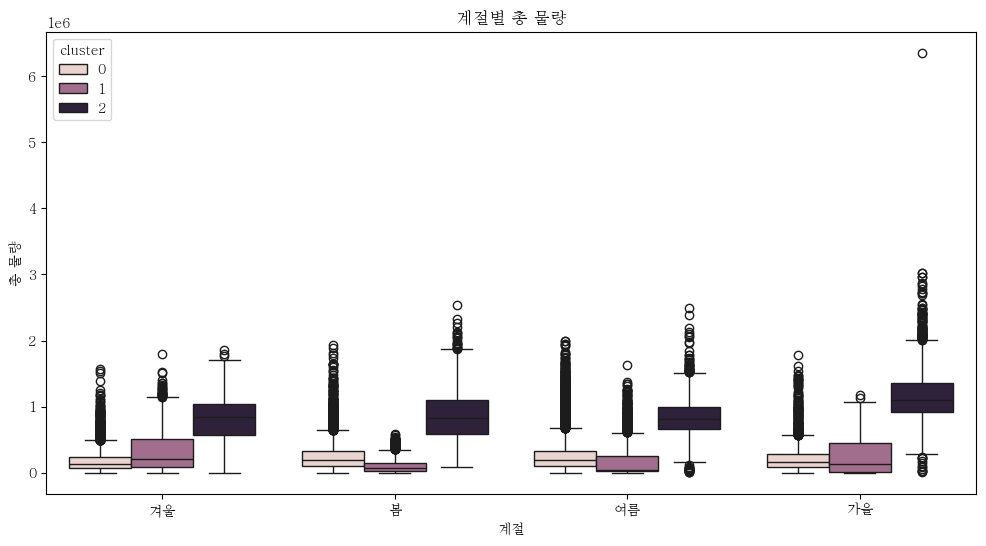

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='total_quantity', hue='cluster', data=data)
plt.title('계절별 총 물량')
plt.xlabel('계절')
plt.ylabel('총 물량')
plot_path = os.path.join(analysis_dir, '계절별_총_물량.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()